In [91]:
import torch
from matplotlib import pyplot as plt
%matplotlib inline

In [67]:
from utils import get_dataloader
from Monodepth import Monodepth

root_dir = './kitti'
dataloader = iter(get_dataloader(root_dir, batch_size=1))
model = Monodepth()

Number of images: 108


In [14]:
sample = next(dataloader)
left_imgs, right_imgs = sample['left_img'], sample['right_img']

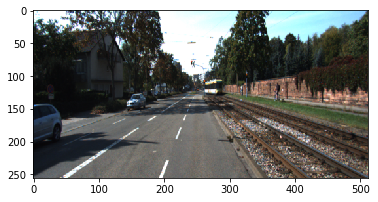

In [79]:
def to_numpy(img):
    return img.permute(0,2,3,1).detach().numpy().squeeze(0)

left_img = to_numpy(left_imgs)
plt.imshow(left_img)

In [141]:
disps = model(left_imgs)

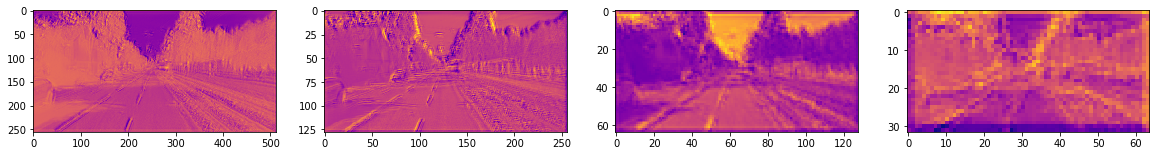

In [146]:
def disp_to_numpy(disp):
    left_disp = disp[:,0,:,:]
    
    return left_disp.detach().numpy().squeeze(0)

fig, axs = plt.subplots(figsize=(20,4), ncols=4)
for i in range(4):
    axs[i].imshow(disp_to_numpy(disps[i]), cmap='plasma')